In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

import numpy as np
import pandas as pd
import amat_utils

## initialize

In [2]:
target_smiles = "Cl[C@@H]1C[C@]([H])(C(C)(C)[C@]23C(C=CC=C4)=C4NC3=O)C2=C([N+]#[C-])[C@@]1(C=C)C"
target = Chem.MolToSmiles(Chem.MolFromSmiles(target_smiles))
target = Chem.MolFromSmiles(target)
Chem.Kekulize(target,clearAromaticFlags=True)

In [3]:
target_atoms = [atm.GetAtomicNum() for atm in target.GetAtoms()]
target_symbs = [atm.GetSymbol() for atm in target.GetAtoms()]

In [4]:
target_atoms[1] = 14

In [5]:
amat = Chem.GetAdjacencyMatrix(target,useBO=True,force=True)
amat_init = Chem.GetAdjacencyMatrix(target,useBO=True,force=True)

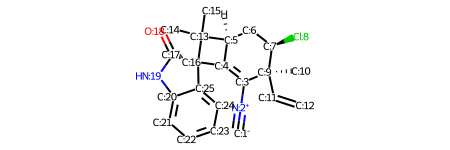

In [7]:
amat_utils.mol_with_atom_index(target)

### start the reversing


In [8]:
changelogs = amat_utils.make_changelogs("./edit_files/edits_welwitindolinone_baran.csv")

In [9]:
changelogs[:3]

[{'edits': ()},
 {'pad': 0,
  'pad_elem': [],
  'edits': [(9, 9, 1), (7, 7, 1), (5, 5, 1), (16, 16, 1)]},
 {'pad': 0,
  'pad_elem': [],
  'edits': [(13, 16, -1),
   (13, 17, 1),
   (17, 18, -2),
   (17, 16, 1),
   (16, 16, -1)]}]

In [10]:
out_1,final_atoms_1 = amat_utils.apply_changes(amat, target_atoms,changelogs[1:])

In [11]:
from rdkit.Chem.Draw import *
for i in range(len(out_1)):
    m = amat_utils.molFromAdjMat(final_atoms_1,out_1[i])
    Chem.SanitizeMol(m)
    print(Chem.MolToSmiles(m))

C.C=CC1(C)C(=O)CC(C(=C)C)CC1Cl.O.[SiH4].c1ccc2[nH]ccc2c1
C.C=CC1(C)C(=O)C(c2c[nH]c3ccccc23)C(C(=C)C)CC1Cl.O.[SiH4]
C.C=CC1(C)C(=O)C2c3c([nH]c4ccccc34)C(C)(C)C2CC1Cl.O.[SiH4]
C.C=CC1(C)C(Cl)CC2C(c3c([nH]c4ccccc34)C2(C)C)C1[SiH3].O.O
C#[Si]C1C2c3c([nH]c4ccccc34)C(C)(C)C2CC(Cl)C1(C)C=C.O.O
C#[Si]C1=C2c3c([nH]c4ccccc34)C(C)(C)C2CC(Cl)C1(C)C=C.O.O
C#[Si]C1=C2C(CC(Cl)C1(C)C=C)C(C)(C)C21C(=O)Nc2ccccc21.O
C#[Si]C1=C2C(CC(Cl)C1(C)C=C)C(C)(C)C21C(=O)Nc2ccccc21.O


In [12]:
save_dict = {"amats":out_1[:-1],"atoms":final_atoms_1}

np.savez("./matrices/welwitindolinone_baran",out_1[:-1],**save_dict)